## In this notebook: ANN classifer model using both good and noisy pixel data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras import datasets
import tensorflow
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, GlobalAveragePooling2D, Softmax
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [2]:
train = pd.read_csv("mnist_train.csv")
train_reduced=train[0:3000]
train_reduced=train_reduced.assign(label=0)

In [3]:
train_reduced.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# good data for predictions
predictions_good=train[9000:10600]

### Making Noisy Data

#### First type of noise

In [7]:
noisy_train1=train[5000:6000]
noisy_train1['10x17'] = noisy_train1['10x17'].replace(0, 0.5, regex=True)
noisy_train1['11x17'] = noisy_train1['11x17'].replace(0, 0.5, regex=True)
noisy_train1['12x17'] = noisy_train1['12x17'].replace(0, 0.5, regex=True)
noisy_train1['13x17'] = noisy_train1['13x17'].replace(0, 0.5, regex=True)
noisy_train1['14x17'] = noisy_train1['14x17'].replace(0, 0.5, regex=True)
noisy_train1['15x17'] = noisy_train1['15x17'].replace(0, 0.5, regex=True)
noisy_train1 = noisy_train1.assign(label=1)

In [8]:
print(np.unique(noisy_train1['label']))

[1]


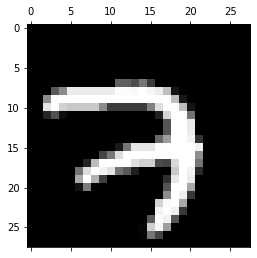

In [9]:
def pixel_mat(row):
    # we're working with train_df so we want to drop the label column
    vec = noisy_train1.drop('label', axis=1).iloc[row].values
    #vec = x_train_noisy.iloc[row].values
    pixel_mat = vec.reshape(28,28)
    return pixel_mat
plt.matshow(pixel_mat(0), cmap=plt.cm.gray)
#plt.title("Digit Label: %d" % train['label'].iloc[x])
plt.show()

#### Second type of noise

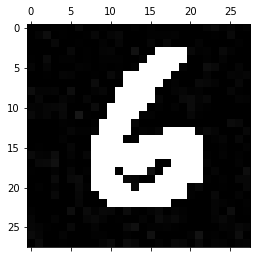

[1]


In [10]:
noisy_train2=train[6000:6500]
noise_factor = 0.01
label=noisy_train2['label']
clean_signal = pd.DataFrame(noisy_train2, dtype=float) 
clean_signal = noisy_train2.drop('label', axis=1)
x_train_noisy = clean_signal + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=(500, 784)) 
x_train_noisy = np.clip(x_train_noisy, 0, 0.4)
noisy_train2 = pd.concat([label,x_train_noisy], axis=1)
#assigning labels
noisy_train2 = noisy_train2.assign(label=1)
def pixel_mat(row):
    # we're working with train_df so we want to drop the label column
    vec = noisy_train2.drop('label', axis=1).iloc[row].values
    #vec = x_train_noisy.iloc[row].values
    pixel_mat = vec.reshape(28,28)
    return pixel_mat
plt.matshow(pixel_mat(0), cmap=plt.cm.gray)
#plt.title("Digit Label: %d" % train['label'].iloc[x])
plt.show()
print(np.unique(noisy_train2['label']))

#### Third type of noise

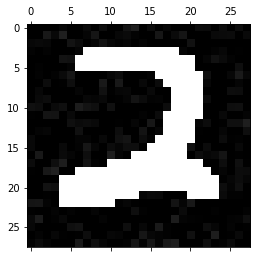

[1]


In [11]:
noisy_train3=train[6500:6700]
noise_factor = 0.1
label=noisy_train3['label']
clean_signal = pd.DataFrame(noisy_train3, dtype=float) 
clean_signal = noisy_train3.drop('label', axis=1)
x_train_noisy = clean_signal + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=(200, 784)) 
x_train_noisy = np.clip(x_train_noisy, 0, 2)
noisy_train3 = pd.concat([label,x_train_noisy], axis=1)


#assigning labels
noisy_train3 = noisy_train3.assign(label=1)
def pixel_mat(row):
    # we're working with train_df so we want to drop the label column
    vec = noisy_train3.drop('label', axis=1).iloc[row].values
    #vec = x_train_noisy.iloc[row].values
    pixel_mat = vec.reshape(28,28)
    return pixel_mat
plt.matshow(pixel_mat(5), cmap=plt.cm.gray)
#plt.title("Digit Label: %d" % train['label'].iloc[x])
plt.show()
print(np.unique(noisy_train3['label']))

#### Fourth type of noise

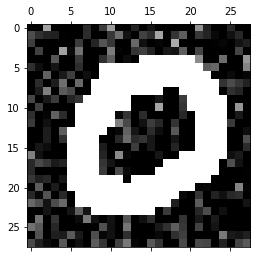

[1]


In [12]:
noisy_train4=train[6700:6750]
noise_factor = 0.5
label=noisy_train4['label']
clean_signal = pd.DataFrame(noisy_train4, dtype=float) 
clean_signal = noisy_train4.drop('label', axis=1)
x_train_noisy = clean_signal + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=(50, 784)) 
x_train_noisy = np.clip(x_train_noisy, 0, 2)
noisy_train4 = pd.concat([label,x_train_noisy], axis=1)
#assigning labels
noisy_train4 = noisy_train4.assign(label=1)
def pixel_mat(row):
    # we're working with train_df so we want to drop the label column
    vec = noisy_train4.drop('label', axis=1).iloc[row].values
    #vec = x_train_noisy.iloc[row].values
    pixel_mat = vec.reshape(28,28)
    return pixel_mat
plt.matshow(pixel_mat(0), cmap=plt.cm.gray)
#plt.title("Digit Label: %d" % train['label'].iloc[x])
plt.show()
print(np.unique(noisy_train4['label']))

In [13]:
train_noisy_all=pd.concat([noisy_train1,noisy_train2,noisy_train3,noisy_train4],ignore_index=True)
#train_all2 = pd.concat([train_reduced,noisy_train],ignore_index=True)

#### Creating other noisy samples for predictions

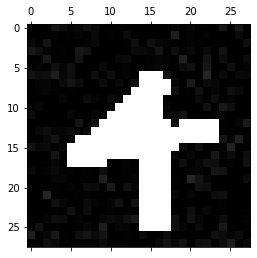

In [14]:
#First type #noisy_data_predictions1
noisy_data_predictions1=train[8000:8100]

noisy_data_predictions1['10x17'] = noisy_data_predictions1['10x17'].replace(0, 0.5, regex=True)
noisy_data_predictions1['11x17'] = noisy_data_predictions1['11x17'].replace(0, 0.5, regex=True)
noisy_data_predictions1['12x17'] = noisy_data_predictions1['12x17'].replace(0, 0.5, regex=True)
noisy_data_predictions1['13x17'] = noisy_data_predictions1['13x17'].replace(0, 0.5, regex=True)
noisy_data_predictions1['14x17'] = noisy_data_predictions1['14x17'].replace(0, 0.5, regex=True)
noisy_data_predictions1['15x17'] = noisy_data_predictions1['15x17'].replace(0, 0.5, regex=True)
noisy_data_predictions1 = noisy_data_predictions1.drop('label', axis=1)

#Second Type 

noisy_data_predictions2=train[8100:8200]
noise_factor2 = 0.01
label=noisy_data_predictions2['label']
clean_signal = pd.DataFrame(noisy_data_predictions2, dtype=float) 
clean_signal = noisy_data_predictions2.drop('label', axis=1)
noisy_data_predictions2 = clean_signal + noise_factor2 * np.random.normal(loc=0.0, scale=1.0, size=(100, 784)) 
noisy_data_predictions2= np.clip(noisy_data_predictions2, 0, 0.4)

#Third type
noise_factor3 = 0.1
noisy_data_predictions3=train[8200:8300]
clean_signal2 = pd.DataFrame(noisy_data_predictions3, dtype=float) 
clean_signal2 = noisy_data_predictions3.drop('label', axis=1)
noisy_data_predictions3 = clean_signal2 + noise_factor3 * np.random.normal(loc=0.0, scale=1.0, size=(100, 784))
noisy_data_predictions3  = np.clip(noisy_data_predictions3, 0, 2)


#Fourth type
noisy_data_predictions4=train[8300:8400]
noise_factor4 = 0.5
label=noisy_data_predictions4['label']
clean_signal = pd.DataFrame(noisy_data_predictions4, dtype=float) 
clean_signal = noisy_data_predictions4.drop('label', axis=1)
noisy_data_predictions4 = clean_signal + noise_factor4 * np.random.normal(loc=0.0, scale=1.0, size=(100, 784)) 
noisy_data_predictions4 = np.clip(noisy_data_predictions4 , 0, 2)

def pixel_mat(row):
    # we're working with train_df so we want to drop the label column
    #vec = noisy_predictions.drop('label', axis=1).iloc[row].values
    vec = noisy_data_predictions3.iloc[row].values
    pixel_mat = vec.reshape(28,28)
    return pixel_mat
plt.matshow(pixel_mat(8), cmap=plt.cm.gray)
#plt.title("Digit Label: %d" % train['label'].iloc[x])
plt.show()


#### Joining datasets

In [15]:
train_all2 = pd.concat([train_reduced,train_noisy_all],ignore_index=True)
#with noise
df_x_noisy=train_all2.iloc[:,1:]
df_y_noisy=train_all2.iloc[:,0]

#without noise
df_x=train_reduced.iloc[:,1:]
df_y=train_reduced.iloc[:,0]

#Check the frequency of each number
df_y.value_counts().sort_index()

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_x_noisy, df_y_noisy, test_size=0.2, random_state=0,shuffle=True)

In [16]:
np.unique(y_test)

array([0, 1])

In [17]:
X_train.shape, X_test.shape

((3800, 784), (950, 784))

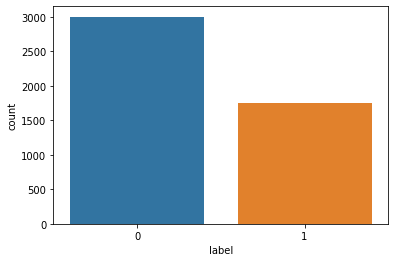

In [18]:
sns.countplot(train_all2['label'],label="Count")

In [19]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [20]:
X_train.shape

(3800, 784)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
model = Sequential()
model.add(Dense(X_train.shape[0] ,input_shape=(784,), activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(X_train.shape[0] ,input_shape=(784,), activation='relu'))
#model.add(Dropout(0.3))
#model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(y_train)
classes = label_encoder.classes_

In [23]:
from sklearn.utils import compute_class_weight
classWeight = compute_class_weight('balanced',classes,y_train) 
classWeight = dict(enumerate(classWeight))
#model.fit(X_train, y_train, batch_size = batch_size, nb_epoch = nb_epochs, show_accuracy = True, verbose = 2, validation_data = (X_test, y_test), class_weight=classWeight)

In [24]:
print("[INFO] training network...")
sgd = SGD(0.000001,decay=1e-6, momentum=0.9, nesterov=True)
#sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy", optimizer='adam',
metrics=["accuracy"])

[INFO] training network...


In [25]:
X_train.shape,y_train.shape,X_test.shape, y_test.shape

((3800, 784), (3800,), (950, 784), (950,))

In [26]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=16, class_weight=classWeight)

Epoch 1/16
119/119 [==============================] - 5s 34ms/step - loss: 0.6170 - accuracy: 0.7282 - val_loss: 0.5607 - val_accuracy: 0.6789
Epoch 2/16
119/119 [==============================] - 4s 32ms/step - loss: 0.5009 - accuracy: 0.7684 - val_loss: 0.4906 - val_accuracy: 0.7642
Epoch 3/16
119/119 [==============================] - 4s 32ms/step - loss: 0.4857 - accuracy: 0.7534 - val_loss: 0.5044 - val_accuracy: 0.7474
Epoch 4/16
119/119 [==============================] - 4s 33ms/step - loss: 0.4505 - accuracy: 0.7876 - val_loss: 0.4963 - val_accuracy: 0.7579
Epoch 5/16
119/119 [==============================] - 4s 30ms/step - loss: 0.4222 - accuracy: 0.8018 - val_loss: 0.5837 - val_accuracy: 0.6589
Epoch 6/16
119/119 [==============================] - 3s 29ms/step - loss: 0.3931 - accuracy: 0.8203 - val_loss: 0.5211 - val_accuracy: 0.7179
Epoch 7/16
119/119 [==============================] - 3s 28ms/step - loss: 0.3594 - accuracy: 0.8389 - val_loss: 0.5165 - val_accuracy: 0.7684

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7571373581886292
Test accuracy: 0.7357894778251648


## Predictions

In [28]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
print("[INFO] evaluating network...")
y_pred = model.predict(X_test)

#print(classification_report(y_test.argmax(axis=1)))

[INFO] evaluating network...
30/30 [==============================] - 1s 7ms/step


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

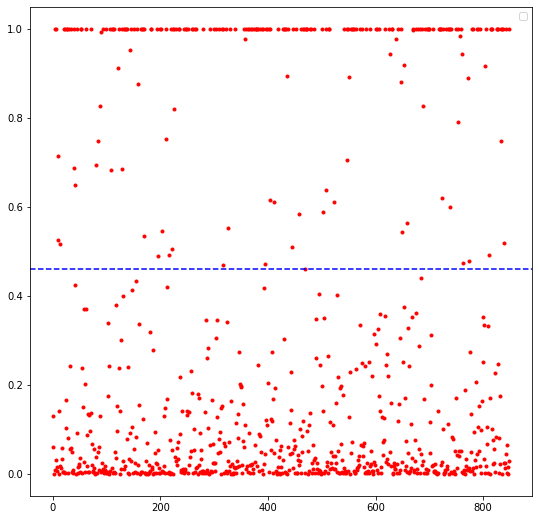

In [614]:
plt.figure(figsize=(9, 9))
plt.plot(y_pred,'.',color='red')
plt.axhline(y=0.46, color='b', linestyle='dashed')
plt.legend()
plt.show

In [29]:
y_pred=np.rint(y_pred)

In [30]:
results = model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 9ms/step - loss: 0.7571 - accuracy: 0.7358


In [31]:
print("Test loss, Test acc:", results)

Test loss, Test acc: [0.7571373581886292, 0.7357894778251648]


In [32]:
print(np.unique(y_test))
print(np.unique(y_pred))

[0 1]
[0. 1.]


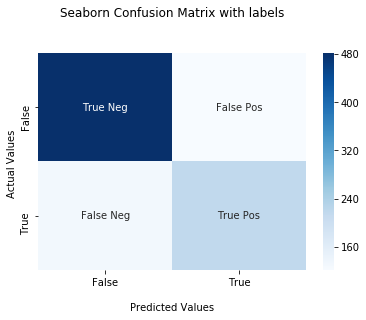

In [55]:
from sklearn.metrics import confusion_matrix
labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [56]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[482 121]
 [130 217]]


####### The model captured 217 out of 347 anomalies (63%, TP/TP+FN, true positive rate, sensitivity. )

In [74]:
#predictions_good

In [92]:
#label=predictions_good['label']
predictions_good=predictions_good.drop(columns='label')

KeyError: "['label'] not found in axis"

In [93]:
predictions_good_= model.predict(predictions_good)
predictions_good_.shape

50/50 [==============================] - 0s 8ms/step


(1600, 1)

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

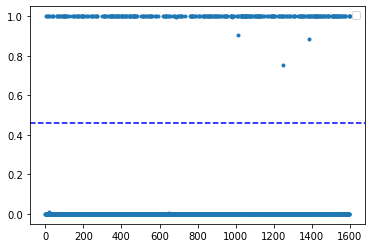

In [94]:
#plt.figure(figsize=(9, 9))
plt.plot(predictions_good_,'.')
plt.axhline(y=0.46, color='b', linestyle='dashed')
plt.legend()
plt.show

In [95]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
y_test_good=np.repeat(0,1600)
predictions_good_=np.rint(predictions_good_)
cf_matrix = confusion_matrix(y_test_good, predictions_good_)
print(cf_matrix)

[[1272  328]
 [   0    0]]


#### Predicting unseen noisy samples

In [57]:
#noisy_data_predictions1 = prediction_noisy1.astype("float32") / 255.0
#prediction_noisy2 = prediction_noisy2.astype("float32") / 255.0
#prediction_noisy3 = prediction_noisy3.astype("float32") / 255.0
#prediction_noisy4 = prediction_noisy4.astype("float32") / 255.0
prediction_noisy1 = model.predict(noisy_data_predictions1)
prediction_noisy2 = model.predict(noisy_data_predictions2)
prediction_noisy3 = model.predict(noisy_data_predictions3)
prediction_noisy4 = model.predict(noisy_data_predictions4)

4/4 [==============================] - 0s 9ms/step


In [58]:
#prediction_noisy4 =prediction_noisy4.to_numpy()
#prediction_noisy4 = prediction_noisy4.reshape((prediction_noisy4.shape[0], 28 * 28 * 1))


In [59]:
#prediction_noisy = model.predict(noisy_predictions)
#prediction_noisy=np.rint(prediction_noisy)

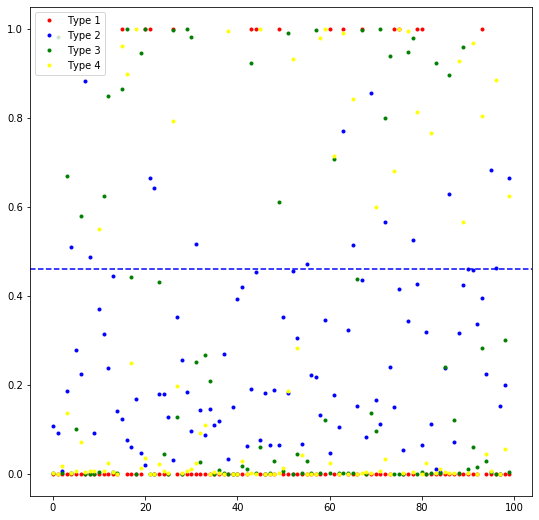

In [60]:
plt.figure(figsize=(9, 9))
plt.plot(prediction_noisy1,'.', color='red', label='Type 1')
plt.plot(prediction_noisy2,'.', color='blue', label='Type 2')
plt.plot(prediction_noisy3,'.',  color='green',label='Type 3')
plt.plot(prediction_noisy4,'.', color='yellow',label='Type 4')
plt.axhline(y=0.46, color='b', linestyle='dashed')
plt.legend()
plt.show()

In [61]:
prediction_noisy1=np.rint(prediction_noisy1)
prediction_noisy2=np.rint(prediction_noisy2)
prediction_noisy3=np.rint(prediction_noisy3)
prediction_noisy4=np.rint(prediction_noisy4)
y_test_noisy=np.repeat(1,100)

In [62]:
cf_matrix1 = confusion_matrix(y_test_noisy, prediction_noisy1)
cf_matrix2 = confusion_matrix(y_test_noisy, prediction_noisy2)
cf_matrix3 = confusion_matrix(y_test_noisy, prediction_noisy3)
cf_matrix4 = confusion_matrix(y_test_noisy, prediction_noisy4)


In [63]:
#First Type
cf_matrix1 

array([[ 0,  0],
       [85, 15]])

####### The model captured 15 out of 100 anomalies (15%, TP/TP+FN,true positive rate, sensitivity. )

In [53]:
#Second Type
cf_matrix2 

array([[ 0,  0],
       [87, 13]])

####### The model captured 13 out of 100 anomalies (13%, TP/TP+FN,true positive rate, sensitivity. )

In [54]:
#Third Type
cf_matrix3 

array([[ 0,  0],
       [74, 26]])

####### The model captured 26 out of 100 anomalies (26%, TP/TP+FN,true positive rate, sensitivity. )

In [52]:
#Fourth Type
cf_matrix4 

array([[ 0,  0],
       [75, 25]])

####### The model captured 25 out of 100 anomalies (25%, TP/TP+FN,true positive rate, sensitivity. )

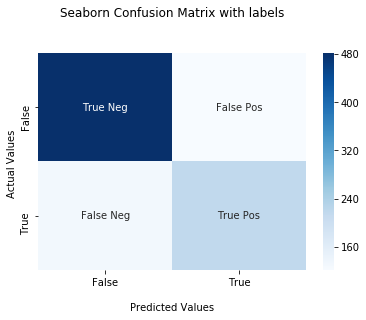

In [45]:
labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Predicting other types of noisy samples

In [46]:
from random import random
from random import gauss
def makeRandomSample(dimensions, minValue=0, maxValue=1.0, pValue=0.5, distribution='uniform', pTable=None):
    theSample = []
    
    for i in range(0, dimensions):
        if distribution == 'uniform':
            v = 0
            if random() < pValue:
                v = random()
                if pTable != None:
                    v = v * (pTable[i] + 0.01)
                else:
                    v = minValue + (v * (maxValue - minValue))
        elif distribution == 'gaussian':
            if pTable != None:
                v = gauss(pTable[i], 0.33)
            else:
                v = gauss((maxValue - minValue) / 2, 0.13)
            
        elif distribution == 'binary':
            v = random()
            if pTable != None:
                if v < pTable[i]:
                    v = 0.9
                else:
                    v = 0.1
            else:
                if v < pValue:
                    v = 0.9
                else:
                    v = 0.1
                    
        if v > maxValue:
            v = maxValue
        if v < minValue:
            v = minValue
        
        theSample.append(v)
        
    return theSample

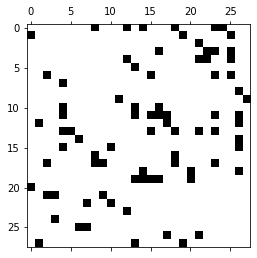

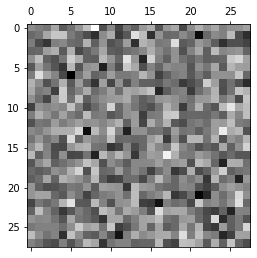

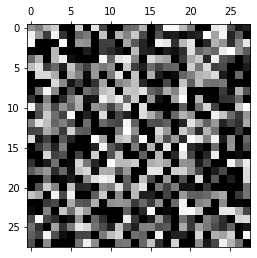

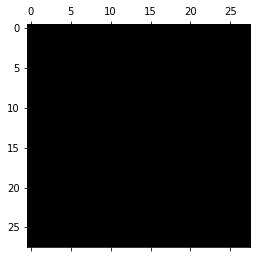

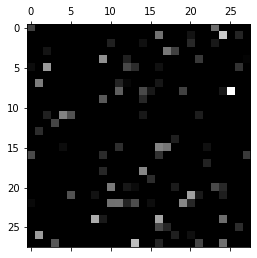

In [47]:
import numpy as np
noisy1=makeRandomSample(28*28, 0, 0.8, 0.9, 'binary', None)
noisy2=makeRandomSample(28*28, 0, 0.8, 0.7, 'gaussian', None)
noisy3=makeRandomSample(28*28, 0, 0.8, 0.7, 'uniform', None)
noisy4=makeRandomSample(28*28, 1, 0.8, 0.7, 'binary', None)
noisy5=makeRandomSample(28*28, 0.3, 0.6, 0.9, 'gaussian', None)
image1=np.array(noisy1).reshape(28,28)
image2=np.array(noisy2).reshape(28,28)
image3=np.array(noisy3).reshape(28,28)
image4=np.array(noisy4).reshape(28,28)
image5=np.array(noisy5).reshape(28,28)
plt.matshow(image1, cmap=plt.cm.gray)
plt.matshow(image2, cmap=plt.cm.gray)
plt.matshow(image3, cmap=plt.cm.gray)
plt.matshow(image4, cmap=plt.cm.gray)
plt.matshow(image5, cmap=plt.cm.gray)

In [65]:
image1=np.array(noisy1)
image1=image1.reshape(1,784)
image1=pd.DataFrame(image1)
image2=np.array(noisy2)
image2=image2.reshape(1,784)
image2=pd.DataFrame(image2)
image3=np.array(noisy3)
image3=image3.reshape(1,784)
image3=pd.DataFrame(image3)
image4=np.array(noisy4)
image4=image4.reshape(1,784)
image4=pd.DataFrame(image4)

image5=np.array(noisy5)
image5=image5.reshape(1,784)
image5=pd.DataFrame(image5)


image1 = image1.astype("float32") / 255.0
image2 = image2.astype("float32") / 255.0
image3 = image3.astype("float32") / 255.0
image4 = image4.astype("float32") / 255.0
image5 = image5.astype("float32") / 255.0

In [66]:
prediction_noisy1 = model.predict(image1)
prediction_noisy2 = model.predict(image2)
prediction_noisy3 = model.predict(image3)
prediction_noisy4 = model.predict(image4)
prediction_noisy5 = model.predict(image5)

1/1 [==============================] - 0s 22ms/step


In [67]:
prediction_noisy1,prediction_noisy2,prediction_noisy3,prediction_noisy4,prediction_noisy5

(array([[0.9999816]], dtype=float32),
 array([[0.9999774]], dtype=float32),
 array([[0.99997747]], dtype=float32),
 array([[0.99998295]], dtype=float32),
 array([[0.9999765]], dtype=float32))

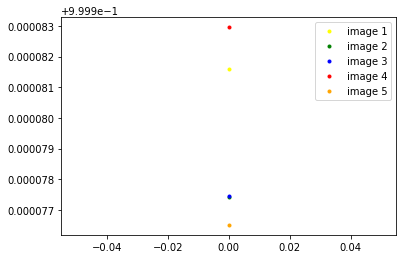

In [68]:
plt.plot(prediction_noisy1,'.',color='yellow',label='image 1')
plt.plot(prediction_noisy2,'.',color='green',label='image 2')
plt.plot(prediction_noisy3,'.',color='blue',label='image 3')
plt.plot(prediction_noisy4,'.', color='red',label='image 4')
plt.plot(prediction_noisy5,'.', color='orange',label='image 5')
plt.legend()
plt.show()
#plt.ylim(0.98,1) 